In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data_assignment_2.csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
df.shape

(149999, 13)

In [4]:
df.nunique()

Id                   149999
Title                 92115
Company               26318
Date                     44
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          121324
FullDescription      127676
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

In [5]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [6]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex = True)
df["Date"] = pd.to_datetime (df["Date"])
df['Id'] =  pd.to_numeric(df['Id'])

In [7]:
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [8]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [9]:
df["AverageSalary"] = (df["LowestSalary"]+df["HighestSalary"])/2
print(df[['Title', 'AverageSalary']])

                                                    Title  AverageSalary
0                                Casual Stock Replenisher           15.0
1                                Casual Stock Replenisher           15.0
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...           15.0
3                                   Team member - Belrose           15.0
4       Business Banking Contact Centre Specialist, Ni...           15.0
...                                                   ...            ...
149994                           Dance Studio Coordinator           15.0
149995                                 Geology Technician           15.0
149996                         Lead Product Manager UX/UI           15.0
149997                             Junior Primary Teacher           15.0
149998                                  Network Engineer            15.0

[149999 rows x 2 columns]


In [10]:
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0]

611

In [11]:
df.drop_duplicates(subset=df.columns.difference(['Id']), inplace = True) 

In [12]:
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0]

0

In [13]:
#Section 1 - Data Analysis and Interpretation
#Part 1 - Analyse by comparison
#Choose your two favourite cities/locations: Brisbane and Sydney

In [14]:
#Which city has more jobs? How many jobs of each type are there in each city? First way to find:
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby('JobType').count()
Brisbane['JobType'] = Brisbane.index
Brisbane.loc['Sum Count'] = Brisbane.sum()
print('Number of Job Postings by Job Type in Brisbane')
print(Brisbane["Id"])

Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby('JobType').count()
Sydney['JobType'] = Sydney.index
Sydney.loc['Sum Count'] = Sydney.sum()
print('Number of Job Postings by Job Type in Sydney')
print(Sydney["Id"])

Number of Job Postings by Job Type in Brisbane
JobType
Casual/Vacation     1537
Contract/Temp       3149
Full Time          10381
Part Time            982
Sum Count          16049
Name: Id, dtype: int64
Number of Job Postings by Job Type in Sydney
JobType
Casual/Vacation     2530
Contract/Temp       8381
Full Time          32143
Part Time           2271
Sum Count          45325
Name: Id, dtype: int64


In [15]:
#Which city has more jobs? How many jobs of each type are there in each city? Second way to find:
favcities_JobType = df[(df["Location"] == "Brisbane") | (df["Location"] == "Sydney")]
favcities_JobType = favcities_JobType.groupby(['Location','JobType']).count()
favcities_JobType['JobType'] = favcities_JobType.index
favcities_JobType['Count'] = favcities_JobType["Id"]
favcities_JobType.loc['Sum Count'] = favcities_JobType.sum()
print('Number of Job Postings by Job Type in Brisbane and Sydney')
print(favcities_JobType["Id"])

Number of Job Postings by Job Type in Brisbane and Sydney
(Brisbane, Casual/Vacation)     1537
(Brisbane, Contract/Temp)       3149
(Brisbane, Full Time)          10381
(Brisbane, Part Time)            982
(Sydney, Casual/Vacation)       2530
(Sydney, Contract/Temp)         8381
(Sydney, Full Time)            32143
(Sydney, Part Time)             2271
Sum Count                      61374
Name: Id, dtype: int64


In [16]:
#In each city, which are the top 5 job sectors? How many jobs are there in each sector? For Brisbane:
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby('Classification').count()
print ("Top five sectors in Brisbane with total number of job postings")
Brisbane.sort_values("Id", ascending = False)["Id"].head(5)

Top five sectors in Brisbane with total number of job postings


Classification
Information & Communication Technology    2036
Trades & Services                         1625
Healthcare & Medical                      1336
Manufacturing, Transport & Logistics      1335
Hospitality & Tourism                     1030
Name: Id, dtype: int64

In [17]:
#In each city, which are the top 5 job sectors? How many jobs are there in each sector? For Sydney:
Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby('Classification').count()
print ("Top five sectors in Sydney with total number of job postings")
Sydney.sort_values("Id", ascending = False)["Id"].head(5)

Top five sectors in Sydney with total number of job postings


Classification
Information & Communication Technology    6971
Trades & Services                         3170
Accounting                                3097
Hospitality & Tourism                     3076
Manufacturing, Transport & Logistics      2526
Name: Id, dtype: int64

    Location                          Classification    Id
17  Brisbane  Information & Communication Technology  2036
29  Brisbane                       Trades & Services  1625
14  Brisbane                    Healthcare & Medical  1336
20  Brisbane    Manufacturing, Transport & Logistics  1335
15  Brisbane                   Hospitality & Tourism  1030


Text(0.5, 1.0, 'Job Posts in the Top 5 sectors in Brisbane')

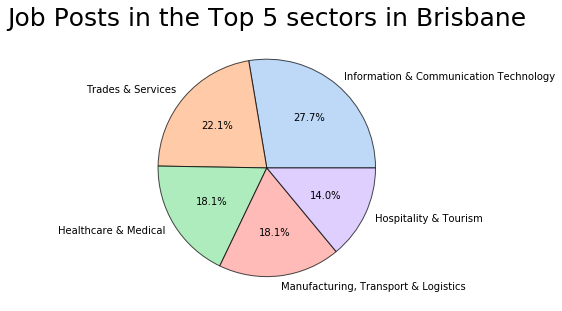

In [18]:
#Visualise the top 5 job sectors in pie chart for each city. For Brisbane:
#Create dataframe for top 5 sectors in Brisbane and calculate the totals
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby(['Location','Classification'], as_index=False)['Id'].count()
dfTop = Brisbane.sort_values(['Location', 'Id'], ascending=False).groupby('Location').head(5)
print (dfTop)

# plot job type and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(dfTop['Id'], colors=sns.color_palette("pastel", len(dfTop)),labels=dfTop['Classification'], wedgeprops={"edgecolor":"k",'linewidth': 1,'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts in the Top 5 sectors in Brisbane', size=25, color='black', loc='center')

   Location                          Classification    Id
17   Sydney  Information & Communication Technology  6971
29   Sydney                       Trades & Services  3170
0    Sydney                              Accounting  3097
15   Sydney                   Hospitality & Tourism  3076
20   Sydney    Manufacturing, Transport & Logistics  2526


Text(0.5, 1.0, 'Job Posts in the Top 5 sectors in Sydney')

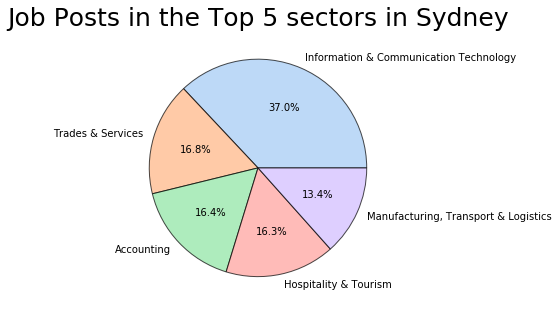

In [19]:
#Visualise the top 5 job sectors in pie chart for each city. For Sydney:
#Create dataframe for top 5 sectors in Sydney and calculate the totals
Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby(['Location','Classification'], as_index=False)['Id'].count()
dfTop = Sydney.sort_values(['Location', 'Id'], ascending=False).groupby('Location').head(5)
print (dfTop)

# plot job type and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(dfTop['Id'], colors=sns.color_palette("pastel", len(dfTop)),labels=dfTop['Classification'], wedgeprops={"edgecolor":"k",'linewidth': 1,'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts in the Top 5 sectors in Sydney', size=25, color='black', loc='center')

In [20]:
#In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
df['SalaryRange'] = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)

favcities_Salary = df[(df["Location"] == "Brisbane") | (df["Location"] == "Sydney")]
favcities_Salary = favcities_Salary.groupby(['Location','SalaryRange']).count()
favcities_Salary['SalaryRange'] = favcities_Salary.index
favcities_Salary['Count'] = favcities_Salary["Id"]
favcities_Salary.loc['Sum Count'] = favcities_Salary.sum()
favcities_Salary.sort_values("SalaryRange")["SalaryRange"]
print('Number of Job Postings by Salary Range in Brisbane and Sydney')
print(favcities_Salary["Id"])

Number of Job Postings by Salary Range in Brisbane and Sydney
(Brisbane, 0 - 30)        2951
(Brisbane, 100 - 120)     1484
(Brisbane, 120 - 150)     1058
(Brisbane, 150 - 200)     1195
(Brisbane, 200 - 250)      545
(Brisbane, 30 - 40)       1188
(Brisbane, 40 - 50)       2265
(Brisbane, 50 - 60)       1478
(Brisbane, 60 - 70)       1608
(Brisbane, 70 - 80)       1383
(Brisbane, 80 - 100)      1306
(Sydney, 0 - 30)          8399
(Sydney, 100 - 120)       4303
(Sydney, 120 - 150)       4198
(Sydney, 150 - 200)       4695
(Sydney, 200 - 250)       1755
(Sydney, 30 - 40)         3031
(Sydney, 40 - 50)         4388
(Sydney, 50 - 60)         3738
(Sydney, 60 - 70)         4142
(Sydney, 70 - 80)         3839
(Sydney, 80 - 100)        3680
Sum Count                62629
Name: Id, dtype: int64


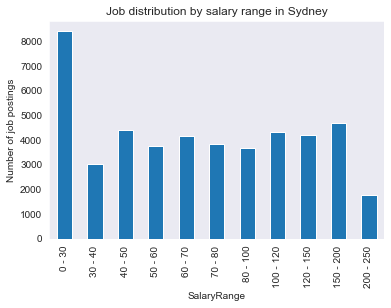

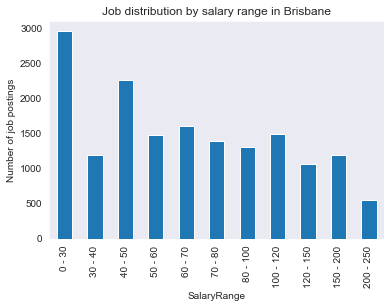

In [60]:
#Related to above - distribution of jobs across salary ranges for the two cities
Sydney = df[(df['Location'] == "Sydney")]
dfTopSyd = Sydney.groupby('SalaryRange').agg({'HighestSalary': ['count','max']})
dfTopSyd.columns = ['JobPostSyd', 'Max Salary']
dfTopSyd = dfTopSyd.reset_index()
dfTopSyd = dfTopSyd.sort_values(by=["Max Salary"], ascending = True)

Brisbane = df[(df['Location'] == "Brisbane")]
dfTopBris = Brisbane.groupby('SalaryRange').agg({'HighestSalary': ['count','max']})
dfTopBris.columns = ['JobPostBris', 'Max Salary']
dfTopBris = dfTopBris.reset_index()
dfTopBris = dfTopBris.sort_values(by=["Max Salary"], ascending = True)

salaryrange_Sydney=dfTopSyd[['SalaryRange', 'JobPostSyd']]
salaryrange_Sydney.plot(x='SalaryRange', y = 'JobPostSyd', kind='bar',legend = False)
plt.title('Job distribution by salary range in Sydney')
plt.xlabel('SalaryRange')
plt.ylabel('Number of job postings')
plt.show()

salaryrange_Brisbane=dfTopBris[['SalaryRange', 'JobPostBris']]
salaryrange_Brisbane.plot(x='SalaryRange', y = 'JobPostBris', kind='bar',legend = False)
plt.title('Job distribution by salary range in Brisbane')
plt.xlabel('SalaryRange')
plt.ylabel('Number of job postings')
plt.show()

In [22]:
#List top 5 companies in each city? For Brisbane
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane['Company'].value_counts()[:5]

Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
Programmed Skilled Workforce    171
The University of Queensland    171
Name: Company, dtype: int64

In [23]:
#Which sectors do the top 5 companies belong to? For Brisbane
dfTopCompBris = df[(df['Company'] == "Jora Local") | (df['Company'] == "u&u. Recruitment Partners") | (df['Company'] ==  "Hudson") | (df['Company'] == "Programmed Skilled Workforce") | (df['Company'] == "The University of Queensland")]
dfTopCompBris = dfTopCompBris.groupby(['Company', 'Classification']).count()
dfTopCompBris['Classification'] = dfTopCompBris.index
dfTopCompBris['Count'] = dfTopCompBris["Id"]
dfTopCompBris.loc['Sum Count'] = dfTopCompBris.sum()
print ('Job sectors posted by the top five companies in Brisbane')
dfTopCompBris["Id"].head(50)

Job sectors posted by the top five companies in Brisbane


(Hudson, Accounting)                                                        81
(Hudson, Administration & Office Support)                                   77
(Hudson, Banking & Financial Services)                                      30
(Hudson, CEO & General Management)                                           2
(Hudson, Call Centre & Customer Service)                                     9
(Hudson, Community Services & Development)                                   2
(Hudson, Construction)                                                      39
(Hudson, Consulting & Strategy)                                              8
(Hudson, Design & Architecture)                                              4
(Hudson, Education & Training)                                               4
(Hudson, Engineering)                                                       68
(Hudson, Government & Defence)                                              39
(Hudson, Healthcare & Medical)                      

In [24]:
#Which sectors do the top 5 companies belong to? For Brisbane
dfTopCompBris = df[(df['Company'] == "Jora Local") | (df['Company'] == "u&u. Recruitment Partners") | (df['Company'] ==  "Hudson") | (df['Company'] == "Programmed Skilled Workforce") | (df['Company'] == "The University of Queensland")]
dfTopCompBris = dfTopCompBris.groupby(['Company', 'Classification']).count()
dfTopCompBris['Classification'] = dfTopCompBris.index
dfTopCompBris['Count'] = dfTopCompBris["Id"]
dfTopCompBris.loc['Sum Count'] = dfTopCompBris.sum()
print ('Job sectors posted by the top five companies in Brisbane')
dfTopCompBris["Id"].tail(33)

Job sectors posted by the top five companies in Brisbane


(The University of Queensland, Community Services & Development)             1
(The University of Queensland, Consulting & Strategy)                        1
(The University of Queensland, Design & Architecture)                        1
(The University of Queensland, Education & Training)                       115
(The University of Queensland, Engineering)                                  8
(The University of Queensland, Farming, Animals & Conservation)              1
(The University of Queensland, Healthcare & Medical)                         9
(The University of Queensland, Human Resources & Recruitment)                2
(The University of Queensland, Information & Communication Technology)       6
(The University of Queensland, Marketing & Communications)                   3
(The University of Queensland, Mining, Resources & Energy)                   1
(The University of Queensland, Real Estate & Property)                       1
(The University of Queensland, Science & Technology)

In [25]:
#List top 5 companies in each city? For Sydney
Sydney = df[(df['Location'] == "Sydney")]
Sydney['Company'].value_counts()[:5]

Jora Local                       1425
Robert Walters                    447
Design & Build                    406
Bluefin Resources Pty Limited     252
Paxus                             250
Name: Company, dtype: int64

In [63]:
#Which sectors do the top 5 companies belong to? For Sydney
dfTopCompSyd = df[(df['Company'] == "Jora Local") | (df['Company'] == "Robert Walters") | (df['Company'] ==  "Design & Build") | (df['Company'] == "Bluefin Resources Pty Limited") | (df['Company'] == "Paxus")]
dfTopCompSyd = dfTopCompSyd.groupby(['Company', 'Classification']).count()
dfTopCompSyd['Classification'] = dfTopCompSyd.index
dfTopCompSyd['Count'] = dfTopCompSyd["Id"]
dfTopCompSyd.loc['Sum Count'] = dfTopCompSyd.sum()
print ('Job sectors posted by the top five companies in Sydney')
dfTopCompSyd["Id"].head(50)

Job sectors posted by the top five companies in Sydney


(Bluefin Resources Pty Limited, Accounting)                                  20
(Bluefin Resources Pty Limited, Administration & Office Support)              3
(Bluefin Resources Pty Limited, Banking & Financial Services)                80
(Bluefin Resources Pty Limited, Call Centre & Customer Service)               2
(Bluefin Resources Pty Limited, Consulting & Strategy)                       19
(Bluefin Resources Pty Limited, Design & Architecture)                        2
(Bluefin Resources Pty Limited, Government & Defence)                         6
(Bluefin Resources Pty Limited, Healthcare & Medical)                        24
(Bluefin Resources Pty Limited, Human Resources & Recruitment)                3
(Bluefin Resources Pty Limited, Information & Communication Technology)     124
(Bluefin Resources Pty Limited, Insurance & Superannuation)                  25
(Bluefin Resources Pty Limited, Legal)                                        1
(Bluefin Resources Pty Limited, Manufact

In [64]:
#Which sectors do the top 5 companies belong to? For Sydney
dfTopCompSyd = df[(df['Company'] == "Jora Local") | (df['Company'] == "Robert Walters") | (df['Company'] ==  "Design & Build") | (df['Company'] == "Bluefin Resources Pty Limited") | (df['Company'] == "Paxus")]
dfTopCompSyd = dfTopCompSyd.groupby(['Company', 'Classification']).count()
dfTopCompSyd['Classification'] = dfTopCompSyd.index
dfTopCompSyd['Count'] = dfTopCompSyd["Id"]
dfTopCompSyd.loc['Sum Count'] = dfTopCompSyd.sum()
print ('Job sectors posted by the top five companies in Sydney')
dfTopCompSyd["Id"].tail(12)

Job sectors posted by the top five companies in Sydney


(Robert Walters, Engineering)                                 14
(Robert Walters, Government & Defence)                         3
(Robert Walters, Human Resources & Recruitment)               19
(Robert Walters, Information & Communication Technology)     250
(Robert Walters, Insurance & Superannuation)                   5
(Robert Walters, Legal)                                        8
(Robert Walters, Manufacturing, Transport & Logistics)        13
(Robert Walters, Marketing & Communications)                  23
(Robert Walters, Mining, Resources & Energy)                   7
(Robert Walters, Real Estate & Property)                       4
(Robert Walters, Sales)                                       24
Sum Count                                                   7279
Name: Id, dtype: int64

Text(0.5, 0, 'Month')

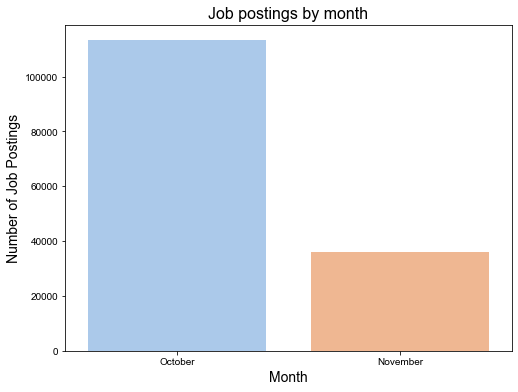

In [27]:
#Section 1 - Data Analysis and Interpretation
#Part 2 - Analyse by time
#Visualise the number of job posts by month.
df_monthly_counts = df[df["Date"].isna()==False]
df_monthly_counts["Month"] =  [x.strftime("%B") for x in df_monthly_counts["Date"]]

df_monthly_counts = df_monthly_counts.groupby('Month').count()
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]

plt.figure(figsize=(8,6))
sns.barplot(x="Label", y="Count", data=df_monthly_counts, palette='pastel', order=['October', 'November'])
sns.set_style("dark")
plt.title("Job postings by month", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Month',fontsize=14)

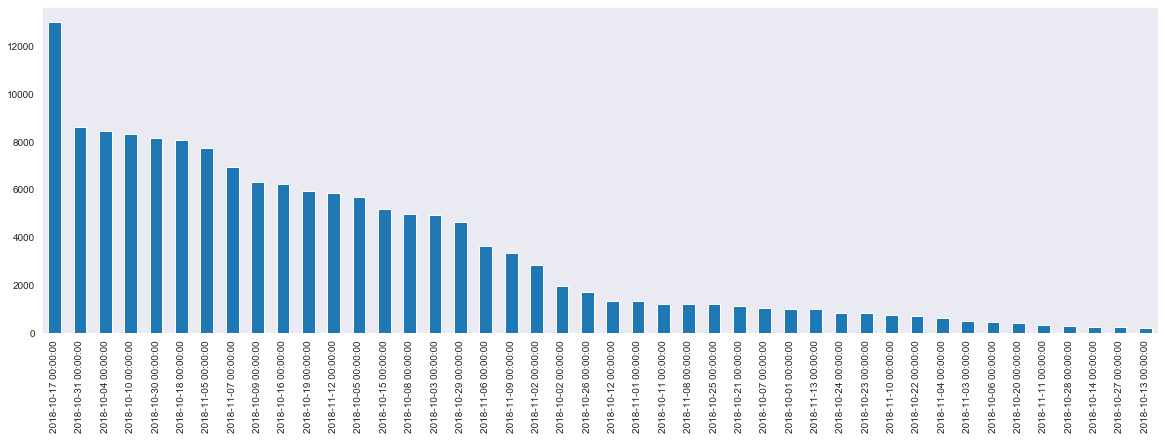

In [28]:
plt.figure(figsize=(20,6))
df['Date'].value_counts()[:44].plot(kind='bar')

Text(0.5, 0, 'Day')

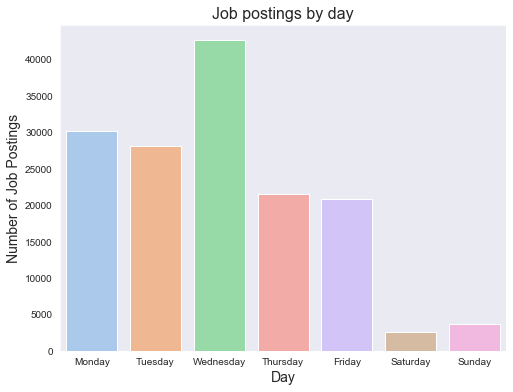

In [29]:
#Visualise the number of job posts by day of week
df_daily_counts = df[df["Date"].isna()==False]
df_daily_counts["Day"] =  [x.strftime("%A") for x in df_daily_counts["Date"]]

df_daily_counts = df_daily_counts.groupby('Day').count()
df_daily_counts['Label'] = df_daily_counts.index
df_daily_counts['Count'] = df_daily_counts["Id"]

plt.figure(figsize=(8,6))
sns.barplot(x="Label", y="Count", data=df_daily_counts, palette='pastel', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.set_style("dark")
plt.title("Job postings by day", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Day',fontsize=14)

Text(0.5, 0, 'Day of Month')

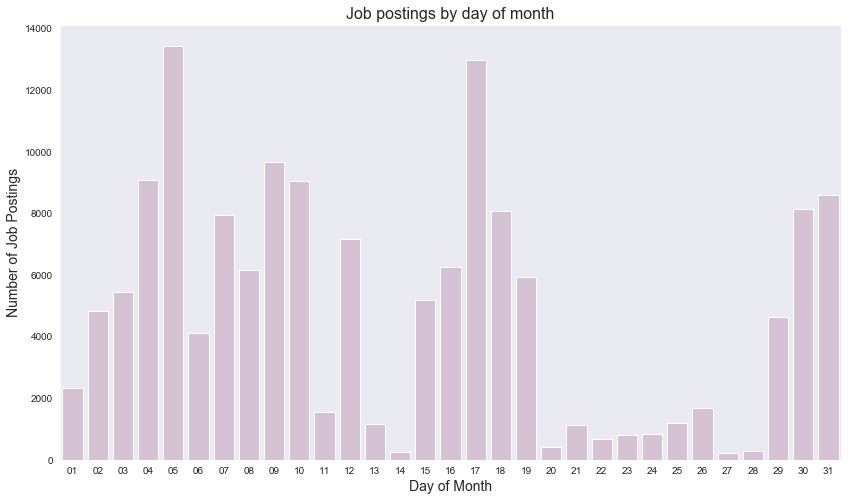

In [30]:
#Visualise the number of job posts by day of the month
df_day_counts = df[df["Date"].isna()==False]
df_day_counts["DayofMonth"] =  [x.strftime("%d") for x in df_day_counts["Date"]]

df_day_counts = df_day_counts.groupby('DayofMonth').count()
df_day_counts['Label'] = df_day_counts.index
df_day_counts['Count'] = df_day_counts["Id"]

plt.figure(figsize=(14,8))
sns.barplot(x="Label", y="Count", data=df_day_counts, color='thistle')
plt.title("Job postings by day of month", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Day of Month',fontsize=14)

In [31]:
#Visualise trending of the job postings for the big cities. First find top 5 cities:
dfTop5cities = df['Location'].value_counts()[:5]
print (dfTop5cities)

Sydney       46168
Melbourne    35185
Brisbane     16461
Perth         9886
Adelaide      4971
Name: Location, dtype: int64


Text(0.5, 0, 'Date')

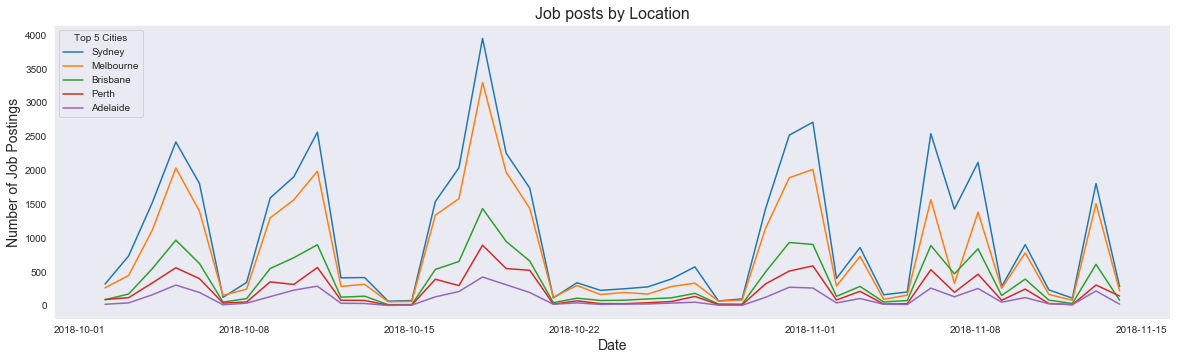

In [32]:
#Visualise trending of the job postings for the big cities. Then plot:
df_Sydney = df[(df["Location"] == "Sydney")]
df_Melbourne = df[(df["Location"] == "Melbourne")]
df_Brisbane = df[(df["Location"] == "Brisbane")]
df_Perth = df[(df["Location"] == "Perth")]
df_Adelaide = df[(df["Location"] == "Adelaide")]

plt.figure(figsize=(20,6))
df_Sydney['Date'].value_counts()[:44].plot(kind='line', label='Sydney')
df_Melbourne['Date'].value_counts()[:44].plot(kind='line', label = 'Melbourne')
df_Brisbane['Date'].value_counts()[:44].plot(kind='line', label = 'Brisbane')
df_Perth['Date'].value_counts()[:44].plot(kind='line', label = 'Perth')
df_Adelaide['Date'].value_counts()[:44].plot(kind='line', label = 'Adelaide')

plt.xticks(rotation=0)
plt.legend(title="Top 5 Cities", loc='upper left')
plt.title("Job posts by Location", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Date',fontsize=14)